In [1]:
from copy import copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

#### 1. Load in the summarized subject stroop data

In [2]:
df = pd.read_pickle('gp_stroop_v2.pkl')
NrSbj=len(df.sbjId.unique())
print('A total of ' + str(NrSbj) + ' subjects')
overallM = df.groupby('sbjId').sbjACC.mean().mean()
stroop_mean = 'Overall accuracy for the stroop task was ' + '{:.2f}'.format(overallM) + '%'
print(stroop_mean)

A total of 16 subjects
Overall accuracy for the stroop task was 92.88%


#### 2. Stroop task performance as a function of 2(Block Type: easy/hard) x 2 (Trial Type: congruent/incongruent)design 

- Mean accuracy

blockType  trialType
easy       con          94.238281
           inc          91.210938
hard       con          93.457031
           inc          92.626953
Name: sbjACC, dtype: float64

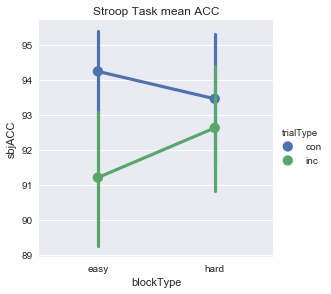

In [3]:
sns.factorplot(x='blockType',y = 'sbjACC', data=df, hue='trialType')
plt.title("Stroop Task mean ACC")
df.groupby(['blockType','trialType']).sbjACC.mean()

- Mean RT

12.9766845857
blockType  trialType
easy       con          591.786836
           inc          602.820340
hard       con          593.824788
           inc          591.881607
Name: sbjRT, dtype: float64


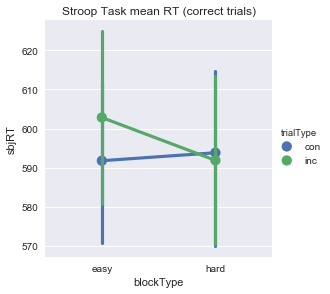

In [4]:
sns.factorplot(x='blockType',y = 'sbjRT', data=df, hue='trialType')
plt.title("Stroop Task mean RT (correct trials)")
condMRT = df.groupby(['blockType','trialType']).sbjRT.mean()
CSPC = condMRT[1]-condMRT[0]-(condMRT[3]-condMRT[2])
print(CSPC)
print(condMRT)

#### 3. Load in the summarized subject memory data, calculate overall memory performance

In [11]:
df = pd.read_pickle('gp_memory_v2.pkl')
CRrate = df.loc[df.blockType=='new','sbjACC'].mean()
acc_new='Overall memory accuracy for new items was ' + '{:.2f}'.format(CRrate) + '%'
print(acc_new)
overallOld = df.loc[df.blockType!='new','sbjACC'].mean()
acc_old='Overall memory accuracy for old items was ' + '{:.2f}'.format(overallOld) + '%'
print(acc_old)
print(100-CRrate)

Overall memory accuracy for new items was 77.66%
Overall memory accuracy for old items was 89.79%
22.34375


#### 4. Recognition memory performance as a function of 2(Block Type: easy/hard) x 2 (Trial Type: congruent/incongruent) design 

blockType  trialType
easy       con          90.332031
           inc          90.625000
hard       con          87.500000
           inc          90.722656
Name: sbjACC, dtype: float64

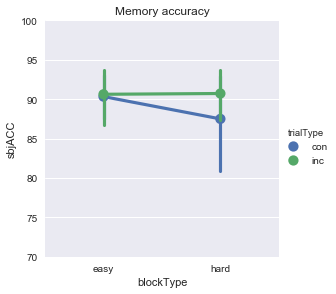

In [6]:
df2= copy(df.loc[df.blockType!='new'])
df2.blockType=pd.Categorical(df2.blockType, categories=['easy','hard'], ordered=True)
df2.trialType=pd.Categorical(df2.trialType, categories=['con','inc'], ordered=True)
sns.factorplot(x='blockType',y = 'sbjACC', data=df2, hue='trialType')
plt.ylim(70,100)
plt.title('Memory accuracy')
df2.groupby(['blockType','trialType']).sbjACC.mean()

#### 5. Memory D-prime: z(Hits)-z(FA)

blockType  trialType
easy       con          0.063057
           inc          0.097452
hard       con         -0.269426
           inc          0.108917
Name: dprime, dtype: float64

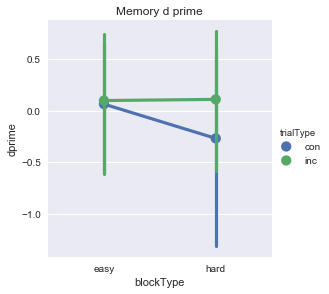

In [7]:
df_new = df.loc[df.blockType=='new',['sbjACC','sbjId']]
df_new['zFA'] = stats.zscore(1-(df_new.sbjACC/100))
df_new.drop('sbjACC',axis=1,inplace=True)
df2 = df2.merge(df_new)
df2['zHits'] = stats.zscore(df2.sbjACC/100)
df2['dprime']= df2.zHits - df2.zFA
sns.factorplot(x='blockType',y = 'dprime', data=df2, hue='trialType')
#plt.ylim(-1.5,1.5)
plt.title('Memory d prime')
df2.groupby(['blockType','trialType']).dprime.mean()

#### 6. Source memory performance

blockType  trialType
easy       con          38.867188
           inc          36.718750
hard       con          49.218750
           inc          53.710938
Name: sbjACC, dtype: float64

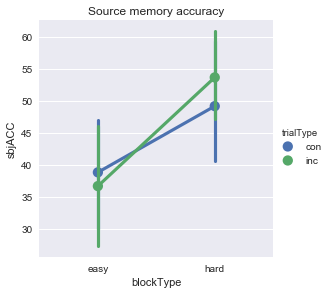

In [8]:
df = pd.read_pickle('gp_sourceMem_v2.pkl')
sns.factorplot(x='blockType',y = 'sbjACC', data=df, hue='trialType')
plt.title('Source memory accuracy')
df.groupby(['blockType','trialType']).sbjACC.mean()

#### 7. Auditory probe detection accuracy

In [9]:
df = pd.read_pickle('gp_memory_v2.pkl')
probe_new = df.loc[df.blockType=='new','probeACC'].mean()
probe_old = df.loc[df.blockType!='new','probeACC'].mean()
print('Overall tone detection following new items was ' + '{:.2f}'.format(probe_new) + '%')

Overall tone detection following new items was 51.17%


blockType  trialType
easy       con          50.000000
           inc          53.125000
hard       con          51.562500
           inc          52.083333
Name: probeACC, dtype: float64

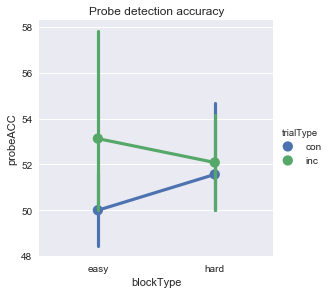

In [10]:
df2= copy(df.loc[df.blockType!='new'])
df2.blockType=pd.Categorical(df2.blockType, categories=['easy','hard'], ordered=True)
df2.trialType=pd.Categorical(df2.trialType, categories=['con','inc'], ordered=True)
sns.factorplot(x='blockType',y = 'probeACC', data=df2, hue='trialType')
plt.title('Probe detection accuracy')
df2.groupby(['blockType','trialType']).probeACC.mean()